In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image

import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.Align import MultipleSeqAlignment
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [3]:

def read_cmap(cmapfile): 
    cmap = np.array(Image.open(cmapfile))

    if len(cmap.shape) == 3:
        cmap = convert2gt(cmap)
    
    return cmap

def convert2label(cmapfile):

    cmap = read_cmap(cmapfile)
    structure_sheet, _ = extract_beta_sheet(cmap)
    structure_helix = extract_alpha_helix(cmap)

    seq_label = np.zeros(cmap.shape[0])
    if structure_sheet is not None:
        for key, value in structure_sheet.items():
            seq_label[value] = 2
    if structure_helix is not None:
        for key, value in structure_helix.items():
            seq_label[value] = 1

    return seq_label



In [4]:
def global_align(seq1, seq2, match=2, mismatch=1, gap_open=-0.5, gap_extend=-0.1):
    alignments = pairwise2.align.globalms(seq1, seq2, match, mismatch, gap_open, gap_extend)
    best_alignment = alignments[0]
    aligned_seq1, aligned_seq2, score, _, _= best_alignment
    num_identical = sum(c1 == c2 for c1, c2 in zip(aligned_seq1, aligned_seq2))
    sim_aln = num_identical / len(aligned_seq1)
    return sim_aln, aligned_seq1, aligned_seq2, score

def local_align(seq1, seq2, match=2, mismatch=1, gap_open=-0.5, gap_extend=-0.1):
    alignments = pairwise2.align.localms(seq1, seq2, match, mismatch, gap_open, gap_extend)
    best_alignment = alignments[0]
    aligned_seq1, aligned_seq2, score, _, _= best_alignment
    num_identical = sum(c1 == c2 for c1, c2 in zip(aligned_seq1, aligned_seq2))
    sim_aln = num_identical / len(aligned_seq1)
    return sim_aln, aligned_seq1, aligned_seq2, score

In [5]:
cmapdir = '/contact_map_structure/test/ss/annot/Color'
cmapfiles = sorted([i for i in os.listdir(cmapdir) if i.endswith(('_1.png', '_2.png', '_3.png', '_4.png')) and i != '3E1Z_B_1.png'])
print(cmapfiles)
print(len(cmapfiles))

['1AEC_A_1.png', '1BP4_A_1.png', '1BQI_A_1.png', '1BSO_A_4.png', '1BSQ_A_4.png', '1BSY_A_4.png', '1BV1_A_2.png', '1BWO_A_3.png', '1CVZ_A_1.png', '1EW3_A_4.png', '1FK0_A_3.png', '1FK1_A_3.png', '1FK2_A_3.png', '1FK3_A_3.png', '1FK4_A_3.png', '1FK5_A_3.png', '1FK6_A_3.png', '1FK7_A_3.png', '1FM4_A_2.png', '1LLT_A_2.png', '1MID_A_3.png', '1MZL_A_3.png', '1MZM_A_3.png', '1PE6_A_1.png', '1PPD_A_1.png', '1PPN_A_1.png', '1PPP_A_1.png', '1QMR_A_2.png', '1YUP_A_4.png', '2AS8_A_1.png', '2BLG_A_4.png', '2PAD_A_1.png', '3BLG_A_4.png', '3GSH_A_3.png', '3LFY_A_1.png', '3NPO_A_4.png', '3NQ3_A_4.png', '3NQ9_A_4.png', '3PH6_A_4.png', '4A80_A_2.png', '4A81_A_2.png', '4A83_A_2.png', '4A84_A_2.png', '4A85_A_2.png', '4A86_A_2.png', '4A87_A_2.png', '4A88_A_2.png', '4A8G_A_2.png', '4A8U_A_2.png', '4A8V_A_2.png', '4B9R_A_2.png', '4BK6_A_2.png', '4BK7_A_2.png', '4BKC_A_2.png', '4BKD_A_2.png', '4BTZ_A_2.png', '4C94_A_2.png', '4C9I_A_2.png', '4MNS_A_2.png', '4PAD_A_1.png', '4QIP_A_2.png', '4XUW_A_3.png', '4Z3L_A

In [6]:
classes = {1:[], 2:[], 3:[], 4:[]}
iter_list2 = []

for cmapfile in cmapfiles:
    cmapdir_file = os.path.join(cmapdir, cmapfile)
    seq_label = convert2label(cmapdir_file)
    if '_1.png' in cmapfile:
        classes[1].append(seq_label)
        c = 1
    elif '_2.png' in cmapfile:
        classes[2].append(seq_label)
        c = 2
    elif '_3.png' in cmapfile:
        classes[3].append(seq_label)
        c = 3
    elif '_4.png' in cmapfile:
        classes[4].append(seq_label)
        c = 4
    iter_list2.append((c, len(classes[c])-1))

iter_list2

[(1, 0),
 (1, 1),
 (1, 2),
 (4, 0),
 (4, 1),
 (4, 2),
 (2, 0),
 (3, 0),
 (1, 3),
 (4, 3),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (2, 1),
 (2, 2),
 (3, 9),
 (3, 10),
 (3, 11),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (2, 3),
 (4, 4),
 (1, 8),
 (4, 5),
 (1, 9),
 (4, 6),
 (3, 12),
 (1, 10),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),
 (2, 19),
 (2, 20),
 (2, 21),
 (2, 22),
 (2, 23),
 (1, 11),
 (2, 24),
 (3, 13),
 (2, 25),
 (2, 26),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (4, 15),
 (2, 27),
 (2, 28),
 (2, 29),
 (2, 30),
 (2, 31),
 (2, 32),
 (2, 33),
 (2, 34),
 (3, 14),
 (4, 16),
 (4, 17),
 (4, 18),
 (4, 19),
 (1, 12),
 (1, 13),
 (2, 35),
 (2, 36),
 (3, 15),
 (1, 14)]

[Text(0, 0, 'IPR000668'),
 Text(1, 0, 'IPR000916'),
 Text(2, 0, 'IPR016140'),
 Text(3, 0, 'IPR000566')]

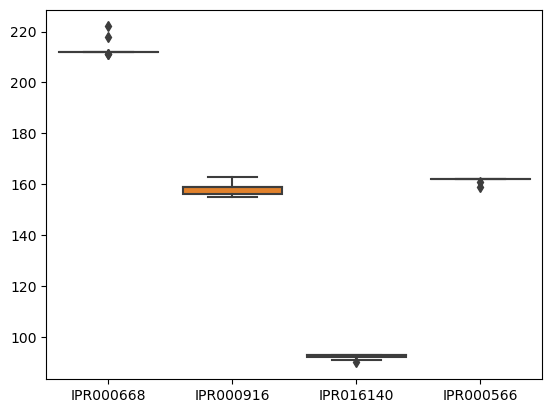

In [7]:
fig, ax = plt.subplots()
sns.boxplot([list(map(len, classes[i])) for i in range(1, 5)], ax=ax)
#ax.set_xticklabels(['Peptidase C1A, papain C-terminal', 'Bet v I/Major latex protein', 'Bifunctional inhibitor/plant lipid transfer protein/seed storage helical domain', 'Lipocalin/cytosolic fatty-acid binding domain'], rotation=45, ha='right')
ax.set_xticklabels(['IPR000668', 'IPR000916', 'IPR016140', 'IPR000566'])

In [8]:
classes[1][0]

array([0., 0., 0., 0., 2., 2., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 2., 2., 2., 2.,
       2., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 2., 2., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 0., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 2., 2., 2., 2., 0., 0.])

In [7]:
translate_table = str.maketrans({'0':'C', '1':'H', '2':'E'})
print(''.join(map(str, map(int, classes[1][0]))))
print(''.join(map(str, map(int, classes[1][0]))).translate(translate_table))

00002201111000000000000111111111111111111110000011111111100000111000111111111111100000000000000000111111100000022220000111111111111022222000111111100022000000000222222222220022222220000000000022222000000111110000222200
CCCCEECHHHHCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHHHCCCCCHHHHHHHHHCCCCCHHHCCCHHHHHHHHHHHHHCCCCCCCCCCCCCCCCCHHHHHHHCCCCCCEEEECCCCHHHHHHHHHHHHCEEEEECCCHHHHHHHCCCEECCCCCCCCCEEEEEEEEEEECCEEEEEEECCCCCCCCCCCEEEEECCCCCCHHHHHCCCCEEEECC


In [8]:
iter_list = [(key, index) for key, value in classes.items() for index in range(len(value))]
print(len(iter_list))
print(iter_list[:])

88
[(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (2, 28), (2, 29), (2, 30), (2, 31), (2, 32), (2, 33), (2, 34), (2, 35), (2, 36), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19)]


## Calculate distance

In [11]:
dist_list = []
translate_table = str.maketrans({'0':'C', '1':'H', '2':'E'})
for ko, io in iter_list:
    for ki, ji in iter_list:
        if (ko < ki) or (ko == ki and io < ji):
            vector1 = classes[ko][io]
            vector2 = classes[ki][ji]

            str1 = ''.join(map(str, map(int, vector1)))
            str2 = ''.join(map(str, map(int, vector2)))

            # translate the sequence from 0->C, 1->H, 2->E
            str1_trans = str1.translate(translate_table)
            str2_trans = str2.translate(translate_table)
            
            #dist = global_align(str1, str2)
            dist = local_align(str1_trans, str2_trans, match=2, mismatch=-1, gap_open=-0.5, gap_extend=-0.1)
            dist_list.append(dist[0])

In [24]:
name_list = [i[:-4] for i in list(map(lambda x:cmapfiles[x], map(lambda x:iter_list2.index(x), iter_list)))]
print(name_list)
print(len(name_list))

['1AEC_A_1', '1BP4_A_1', '1BQI_A_1', '1CVZ_A_1', '1PE6_A_1', '1PPD_A_1', '1PPN_A_1', '1PPP_A_1', '2AS8_A_1', '2PAD_A_1', '3LFY_A_1', '4PAD_A_1', '6H8T_A_1', '6PAD_A_1', '9PAP_A_1', '1BV1_A_2', '1FM4_A_2', '1LLT_A_2', '1QMR_A_2', '4A80_A_2', '4A81_A_2', '4A83_A_2', '4A84_A_2', '4A85_A_2', '4A86_A_2', '4A87_A_2', '4A88_A_2', '4A8G_A_2', '4A8U_A_2', '4A8V_A_2', '4B9R_A_2', '4BK6_A_2', '4BK7_A_2', '4BKC_A_2', '4BKD_A_2', '4BTZ_A_2', '4C94_A_2', '4C9I_A_2', '4MNS_A_2', '4QIP_A_2', '4Z3L_A_2', '5AMW_A_2', '6AWT_A_2', '6AWU_A_2', '6AWV_A_2', '6AWW_A_2', '6AWX_A_2', '6AWY_A_2', '6AWZ_A_2', '6B1D_A_2', '6ST8_A_2', '6ST9_A_2', '1BWO_A_3', '1FK0_A_3', '1FK1_A_3', '1FK2_A_3', '1FK3_A_3', '1FK4_A_3', '1FK5_A_3', '1FK6_A_3', '1FK7_A_3', '1MID_A_3', '1MZL_A_3', '1MZM_A_3', '3GSH_A_3', '4XUW_A_3', '6FRR_A_3', '7KSC_A_3', '1BSO_A_4', '1BSQ_A_4', '1BSY_A_4', '1EW3_A_4', '1YUP_A_4', '2BLG_A_4', '3BLG_A_4', '3NPO_A_4', '3NQ3_A_4', '3NQ9_A_4', '3PH6_A_4', '5IO5_A_4', '5IO6_A_4', '5IO7_A_4', '5LKE_A_4', '5L

In [25]:
dist_matrix = squareform(dist_list)
# replace the diagonal with 1
np.fill_diagonal(dist_matrix, 1)
df = pd.DataFrame(dist_matrix, index=name_list, columns=name_list)
df

,1AEC_A_1,1BP4_A_1,1BQI_A_1,1CVZ_A_1,1PE6_A_1,1PPD_A_1,1PPN_A_1,1PPP_A_1,2AS8_A_1,2PAD_A_1,...,3PH6_A_4,5IO5_A_4,5IO6_A_4,5IO7_A_4,5LKE_A_4,5LKF_A_4,6FXB_A_4,6GE7_A_4,6GFS_A_4,6GHH_A_4
1AEC_A_1,1.000000,0.776860,0.740891,0.845494,0.762295,0.740891,0.885965,0.762295,0.818182,0.733871,...,0.400000,0.408922,0.423221,0.435606,0.403704,0.407407,0.378182,0.403704,0.408922,0.403704
1BP4_A_1,0.776860,1.000000,0.892857,0.827586,0.835498,0.843478,0.789030,0.835498,0.722222,0.774059,...,0.382900,0.391791,0.406015,0.418251,0.386617,0.390335,0.361314,0.386617,0.391791,0.386617
1BQI_A_1,0.740891,0.892857,1.000000,0.752066,0.804255,0.811966,0.766667,0.804255,0.688716,0.737705,...,0.362637,0.376384,0.400749,0.407547,0.376384,0.385185,0.341727,0.371324,0.386617,0.371324
1CVZ_A_1,0.845494,0.827586,0.752066,1.000000,0.819742,0.796610,0.918552,0.819742,0.778689,0.796610,...,0.398496,0.407547,0.422053,0.434615,0.402256,0.406015,0.376384,0.402256,0.407547,0.402256
1PE6_A_1,0.762295,0.835498,0.804255,0.819742,1.000000,0.918552,0.811966,1.000000,0.729084,0.843478,...,0.377778,0.402256,0.411321,0.418251,0.402256,0.400749,0.371324,0.397004,0.402256,0.397004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5LKF_A_4,0.407407,0.390335,0.385185,0.406015,0.400749,0.390335,0.390335,0.400749,0.386282,0.364964,...,0.804469,0.851429,0.894737,0.770492,0.820225,1.000000,0.760870,0.840909,0.851429,0.862069
6FXB_A_4,0.378182,0.361314,0.341727,0.376384,0.371324,0.356364,0.376384,0.371324,0.366548,0.334532,...,0.911243,0.883721,0.792135,0.820225,0.894737,0.760870,1.000000,0.894737,0.883721,0.883721
6GE7_A_4,0.403704,0.386617,0.371324,0.402256,0.397004,0.371324,0.402256,0.397004,0.391304,0.354015,...,0.957576,0.987730,0.865497,0.894737,0.951807,0.840909,0.894737,1.000000,0.963636,0.975610
6GFS_A_4,0.408922,0.391791,0.386617,0.407547,0.402256,0.376384,0.407547,0.402256,0.391304,0.358974,...,0.922619,0.975610,0.876471,0.894737,0.963636,0.851429,0.883721,0.963636,1.000000,0.987730


In [66]:
name_sele_1 = [i for i in name_list if i.endswith('_1')]
name_sele_2 = [i for i in name_list if i.endswith('_2')]
# select a sub dataframe where index and columns are in name_sele
df.loc[name_sele_1, name_sele_2].max()

1BV1_A_2    0.410646
1FM4_A_2    0.412214
1LLT_A_2    0.416031
1QMR_A_2    0.400000
4A80_A_2    0.400000
4A81_A_2    0.410646
4A83_A_2    0.405303
4A84_A_2    0.405303
4A85_A_2    0.400000
4A86_A_2    0.405303
4A87_A_2    0.400000
4A88_A_2    0.400000
4A8G_A_2    0.410646
4A8U_A_2    0.400000
4A8V_A_2    0.400000
4B9R_A_2    0.394531
4BK6_A_2    0.400000
4BK7_A_2    0.400000
4BKC_A_2    0.400000
4BKD_A_2    0.396226
4BTZ_A_2    0.385827
4C94_A_2    0.393382
4C9I_A_2    0.380074
4MNS_A_2    0.400000
4QIP_A_2    0.410646
4Z3L_A_2    0.405303
5AMW_A_2    0.386861
6AWT_A_2    0.350181
6AWU_A_2    0.350943
6AWV_A_2    0.347985
6AWW_A_2    0.340824
6AWX_A_2    0.347985
6AWY_A_2    0.347985
6AWZ_A_2    0.345324
6B1D_A_2    0.347985
6ST8_A_2    0.390511
6ST9_A_2    0.390511
dtype: float64

## Make plots

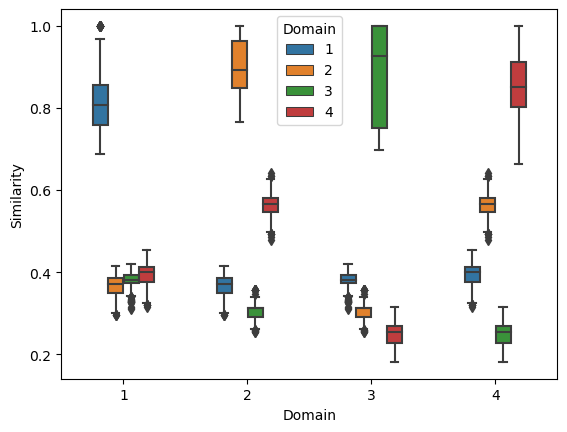

In [96]:
# melt the pairwise df to a long table with 3 columns: protein1, protein2, similarity
df_long = df.stack().reset_index().rename(columns={'level_0': 'Protein1', 'level_1': 'Protein2', 0: 'Similarity'})
df_long['Domain1'] = df_long['Protein1'].str.split('_', expand=True)[2]
df_long['Domain2'] = df_long['Protein2'].str.split('_', expand=True)[2]
# grouped boxplot
fig, ax = plt.subplots()
sns.boxplot(x='Domain1', y='Similarity', hue='Domain2', data=df_long, ax=ax, dodge=True, width=0.5)
ax.set_xlabel('Domain')
# set legend title
ax.legend(title='Domain')
# adjust the alpha of each boxplot



In [89]:
list(ax.artists)

[]

In [75]:
df_long['Protein1'].str.split('_', expand=True)

,0,1,2
0,1AEC,A,1
1,1AEC,A,1
2,1AEC,A,1
3,1AEC,A,1
4,1AEC,A,1
...,...,...,...
7739,6GHH,A,4
7740,6GHH,A,4
7741,6GHH,A,4
7742,6GHH,A,4


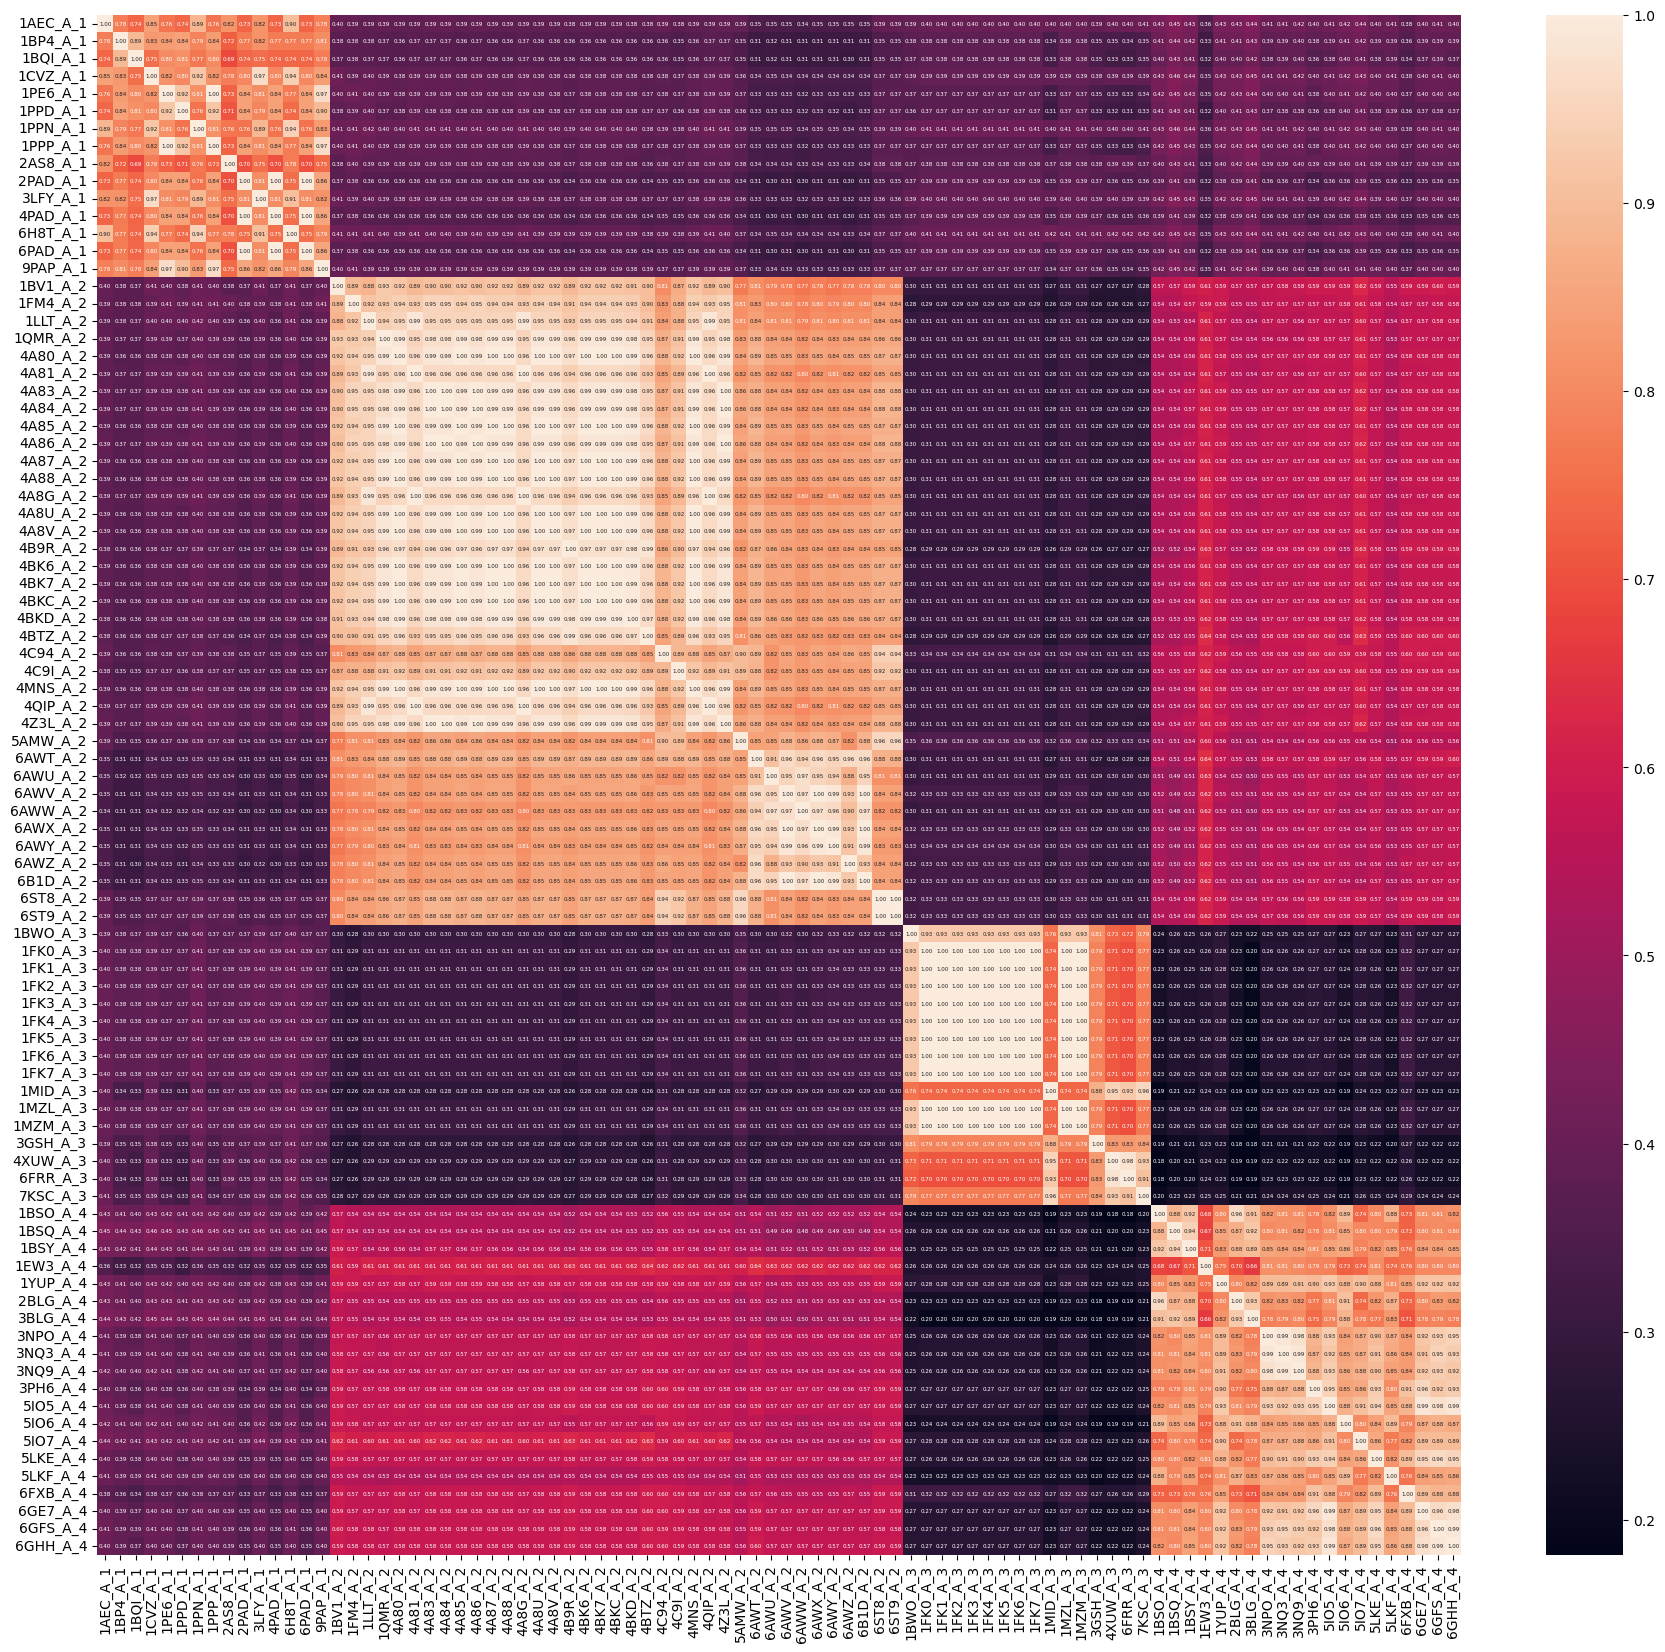

In [26]:
fig, ax = plt.subplots(figsize=(22, 20))
sns.heatmap(df, annot=True, fmt='.2f', annot_kws={'size':4})
#plt.savefig('similarity.pdf', bbox_inches='tight')
plt.show()

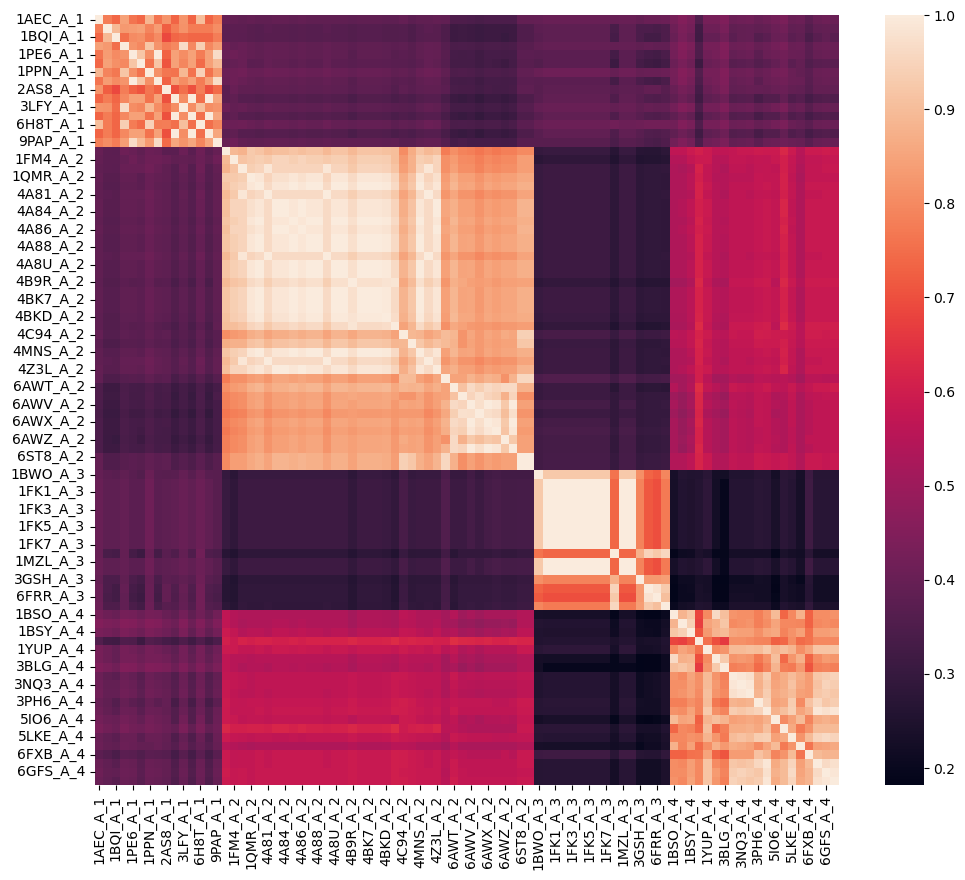

In [46]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df, linecolor='white', linewidths=0.001, ax=ax)
#plt.savefig('similarity.pdf', bbox_inches='tight')
plt.show()

In [136]:
seq_objects = [SeqRecord(Seq(''.join(list(map(str, map(int, seq)))))) for seq in classes[1]]
#seq_objects = [''.join(list(map(str, map(int, seq)))) for seq in classes[1]]
# Create a MultipleSeqAlignment object
alignment = MultipleSeqAlignment(seq_objects)

# Calculate the consensus sequence
consensus_sequence = alignment.get_consensus()

print("Consensus Sequence:", consensus_sequence)

ValueError: Sequences must all be the same length

In [137]:
seq_objects


[SeqRecord(seq=Seq('000022011110000000000001111111111111111111100000111111...200'), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('000000111100000000000000111111111111111111000000011111...200'), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('000000111100000000000000111111111111111110000000011111...200'), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('000022000000000000000001111111111111111111100000111111...200'), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('000022200000000000000001111111111111111111000000011111...200'), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('000022200000000000000001111111111111111111000000011111...200'), id='<unknown id>', name='<unknown na

In [55]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

vector1 = classes[3][0]
vector2 = classes[3][1]

str1 = ''.join(map(str, map(int, vector1))).translate(translate_table)
str2 = ''.join(map(str, map(int, vector2))).translate(translate_table)

print(str1)
print(str2)

# pairwise2.align.globalxx(str1, str2)
# pairwise2.align.globalms(str1, str2, match, mismatch, gap_open, gap_extend)
alignments = pairwise2.align.globalms(str1, str2, 2, 1, -0.5, -0.1)

best_alignment = alignments[0]
#print(best_alignment)
aligned_seq1, aligned_seq2, score, _, _= best_alignment

num_identical = sum(c1 == c2 for c1, c2 in zip(aligned_seq1, aligned_seq2)) 
similarity_aln = num_identical / len(aligned_seq1)
similarity_seq1 = num_identical / len(str1)
similarity_seq2 = num_identical / len(str2)

print("\nAlignment:")
print(format_alignment(*best_alignment, full_sequences=True))
print("#identical:", num_identical)
print("Similarity alig:", similarity_aln)
print("Similarity seq1:", similarity_seq1, len(str1))
print("Similarity seq2:", similarity_seq2, len(str2))

CCHHHHHHHHHHHHHHHCCCCCCCHHHHHHHHHHHHHCCCHHHHHHHHHHHHHHHCCCCCCCHHHHHHHHHHHCCCCCCCCCCCCCCCCC
CCCHHHHHHHHHHHHHHHCCCCCCCCHHHHHHHHHHHHHCCCHHHHHHHHHHHHHHHHCCCCCCHHHHHHHHHHCCCCCCCCCCCCCCCCCCC

Alignment:
CC-HHHHHHHHHHHHHHHCCCCCCC-HHHHHHHHHHHHHCCCHHHHHHHHHHHHHHHCCCCCCCHHHHHHHHHHHCCCCCCCCCCCCCCCCC-
|| |||||||||||||||||||||| |||||||||||||||||||||||||||||||.||||||||||||||||.||||||||||||||||| 
CCCHHHHHHHHHHHHHHHCCCCCCCCHHHHHHHHHHHHHCCCHHHHHHHHHHHHHHHHCCCCCCHHHHHHHHHHCCCCCCCCCCCCCCCCCCC
  Score=176.5

#identical: 88
Similarity alig: 0.946236559139785
Similarity seq1: 0.9777777777777777 90
Similarity seq2: 0.946236559139785 93


In [47]:
# from fastdtw import fastdtw
# from scipy.spatial.distance import euclidean

# vector1 = classese[1][1].reshape(-1, 1)
# vector2 = classese[3][2].reshape(-1, 1)

# distance, path = fastdtw(vector1, vector2, dist=euclidean)
# print(distance)
# print(path)

114.0
[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 3), (24, 4), (24, 5), (25, 5), (26, 5), (27, 5), (28, 5), (29, 5), (30, 5), (31, 5), (32, 5), (33, 5), (34, 5), (35, 5), (36, 5), (37, 5), (38, 5), (39, 5), (40, 5), (41, 5), (42, 5), (43, 5), (44, 6), (45, 7), (46, 8), (47, 9), (48, 9), (49, 9), (50, 9), (51, 9), (52, 9), (53, 9), (54, 9), (55, 9), (56, 9), (57, 9), (58, 9), (59, 9), (60, 9), (61, 9), (62, 9), (63, 9), (64, 9), (65, 9), (66, 9), (67, 9), (68, 9), (69, 9), (70, 9), (71, 9), (72, 9), (73, 9), (74, 9), (75, 9), (76, 9), (77, 9), (78, 9), (79, 9), (80, 9), (81, 9), (82, 10), (83, 11), (84, 12), (85, 13), (86, 14), (87, 15), (88, 16), (89, 17), (90, 18), (90, 19), (91, 19), (92, 19), (92, 20), (92, 21), (93, 21), (94, 21), (95, 21), (96, 21), (97, 21), (98, 21), (99, 21), (100, 21), (101, 21),

## HMM modelling

In [9]:
from hmmlearn import hmm

In [23]:
[len(classes[i]) for i in range(1, 5)]

[15, 37, 16, 20]

In [25]:
# save the secondary structure sequences in fasta
translate_table = str.maketrans({'0':'C', '1':'H', '2':'E'})

seq_dict = {1:[], 2:[], 3:[], 4:[]}

for cmapfile in cmapfiles:
    cmapdir_file = os.path.join(cmapdir, cmapfile)
    seq_label = convert2label(cmapdir_file)
    ss_seq = ''.join(map(str, map(int, seq_label))).translate(translate_table)
    header = cmapfile.split('.')[0]

    if '_1.png' in cmapfile:
        seq_dict[1].append(f'>{header}\n{ss_seq}\n')
    elif '_2.png' in cmapfile:
        seq_dict[2].append(f'>{header}\n{ss_seq}\n')
    elif '_3.png' in cmapfile:
        seq_dict[3].append(f'>{header}\n{ss_seq}\n')
    elif '_4.png' in cmapfile:
        seq_dict[4].append(f'>{header}\n{ss_seq}\n')
    

for d in range(1, 5):
    outfile = open(f'/contact_map_structure/data/sequences/domain_ss/domain_ss_{d}.fa', 'w')
    ss_seqs = ''.join(seq_dict[d])
    outfile.write(f'{ss_seqs}')
    outfile.close()

In [32]:
# construct profile HMM

data = '''
B-ABC-CDD
BDDCEEE-D
BCCA-A-DD
-DBEDAADD
B-DCCDEDE
'''.split()
data

['B-ABC-CDD', 'BDDCEEE-D', 'BCCA-A-DD', '-DBEDAADD', 'B-DCCDEDE']

In [28]:
msa=[]
for n in data:
    msa.append("^" + n + "$")
    
states = 'A B C D E'.split()
msa

['^B-ABC-CDD$', '^BDDCEEE-D$', '^BCCA-A-DD$', '^-DBEDAADD$', '^B-DCCDEDE$']

In [31]:
theta = 0.385
insert=[]
not_insert=[]
for i in range(len(msa[0])):
    c=0
    for n in msa:
        if n[i] == '-':
            c+=1
    if c/len(msa) < theta:
        not_insert.append(i)
    else:
        insert.append(i)
not_insert

[0, 1, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
# transition prob for non-insertion site i
def p_not_insert(i):
    dd=0
    md=0
    mm=0
    dm=0
    for n in msa:
        if n[i] == '-':
            if n[i-1] == '-':
                dd+=1
            else:
                md+=1
        else:
            if n[i-1] == '-':
                dm+=1
            else:
                mm+=1
    if mm:
        output['M'+str(not_insert.index(i)-1)]['M'+str(not_insert.index(i))] = mm/(mm+md)
    if md:
        output['M'+str(not_insert.index(i)-1)]['D'+str(not_insert.index(i))] = md/(mm+md)
    if dm:
        output['D'+str(not_insert.index(i)-1)]['M'+str(not_insert.index(i))] = dm/(dm+dd)
    if dd:
        output['D'+str(not_insert.index(i)-1)]['D'+str(not_insert.index(i))] = dd/(dm+dd)

# transition prob for insertion starting site i
def p_insert(i):
    j = not_insert[not_insert.index(i-1)+1]
    c=[]
    mm=0
    md=0
    dm=0
    dd=0
    mi=0
    di=0
    for n in msa:
        c.append(j - i - n[i:j].count('-'))
        if j-i == n[i:j].count('-'):
            if n[i-1] == '-':
                if n[j] == '-':
                    dd+=1
                else:
                    dm+=1
            else:
                if n[j] == '-':
                    md+=1
                else:
                    mm+=1
        else:
            if n[i-1] == '-':
                di+=1
            else:
                mi+=1
    if di:
        output['D'+str(not_insert.index(i-1))]['I'+str(not_insert.index(i-1))] = di/(dd+dm+di)
    if mi:
        output['M'+str(not_insert.index(i-1))]['I'+str(not_insert.index(i-1))] = mi/(mi+mm+md)
    if sum(c)-(len(msa)-dd-dm-md-mm):
        output['I'+str(not_insert.index(i-1))]['I'+str(not_insert.index(i-1))] = 1-(len(msa)-dd-dm-md-mm)/sum(c)
    if dd:
        output['D'+str(not_insert.index(i-1))]['D'+str(not_insert.index(i-1)+1)] = dd/(dd+dm+di)
    if dm:
        output['D'+str(not_insert.index(i-1))]['M'+str(not_insert.index(i-1)+1)] = dm/(dd+dm+di)
    if md:
        output['M'+str(not_insert.index(i-1))]['D'+str(not_insert.index(i-1)+1)] = md/(md+mm+mi)
    if mm:
        output['M'+str(not_insert.index(i-1))]['M'+str(not_insert.index(i-1)+1)] = mm/(md+mm+mi)
    output['I'+str(not_insert.index(i-1))]['M'+str(not_insert.index(i-1)+1)] = (len(msa)-dd-dm-md-mm)/sum(c)

# transition probability matrix
output={}
output['M0']={}
output['I0']={}
for i in range(1, len(not_insert)-1):
    output['M'+str(i)]={}
    output['D'+str(i)]={}
    output['I'+str(i)]={}
output['M'+str(len(not_insert)-1)]={}

for k in output:
    for l in output:
        output[k][l]=0

for i in range(1, len(msa[0])):
    if i in not_insert:
        if i-1 in not_insert:
            p_not_insert(i)
    else:
        if i-1 not in insert:
            p_insert(i)

# emission probability matrix
output2={}
output2['M0']={}
output2['I0']={}
for i in range(1, len(not_insert)-1):
    output2['M'+str(i)]={}
    output2['D'+str(i)]={}
    output2['I'+str(i)]={}
output2['M'+str(len(not_insert)-1)]={}

for k in output2:
    for s in states:
        output2[k][s]=0

for i in not_insert:
    if i-1 in not_insert:
        s=[]
        for n in msa:
            s.append(n[i])
        for state in states:
            output2['M'+str(not_insert.index(i))][state] = s.count(state)/(len(msa)-s.count('-'))

for i in insert:
    if i-1 not in insert:
        j = not_insert[not_insert.index(i-1)+1]
        s=''
        for n in msa:
            s += n[i:j]
        for state in states:
            output2['I'+str(not_insert.index(i-1))][state] = s.count(state)/(len(s)-s.count('-'))
        s=[]
        for n in msa:
            s.append(n[j])
        for state in states:
            output2['M'+str(not_insert.index(i-1)+1)][state] = s.count(state)/(len(msa)-s.count('-'))

# # output matrices
# with open('matrices.txt', 'w') as f1:
#     f1.write('\t')
#     f1.write('\t'.join(list(output.keys())))
#     f1.write('\n')
#     for k in output:
#         f1.write(k)
#         for l in output:
#             f1.write('\t'+str(output[k][l]))
#         f1.write('\n')
#     f1.write('-'*8+'\n')
#     f1.write('\t')
#     f1.write('\t'.join(states))
#     f1.write('\n')
#     for k in output2:
#         f1.write(k)
#         for l in states:
#             f1.write('\t'+str(output2[k][l]))
#         f1.write('\n')